  ##                         PROJECT ON CUSTOMER'S SEGMENTAION USING K-MEANS CLUSTERING ALGORITHM 
                           
   ##                THIS PROJECT AIM TO PLACE CUSTOMERS IN DIFFERENT CLUSTERS BASE ON THEIR CREDIT BALANCE  FOR A PARTICALAR FINANCIAL ESTABLISHMENT                        

In [1]:
# importing the necessary libraries and the data set 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

df = pd.read_csv('C_SEGMENTATON.csv')
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


## data exploration and understanding

In [2]:
df.shape

(8950, 18)

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
## checking for null values

df.isnull().sum().any()

True

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
## replacing null values with mean

df[['CREDIT_LIMIT','MINIMUM_PAYMENTS']] = df[['CREDIT_LIMIT','MINIMUM_PAYMENTS']].fillna(df[['CREDIT_LIMIT','MINIMUM_PAYMENTS']].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
x=df.drop(['CUST_ID'],axis=1)
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
x.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Text(0, 0.5, 'BALANCE')

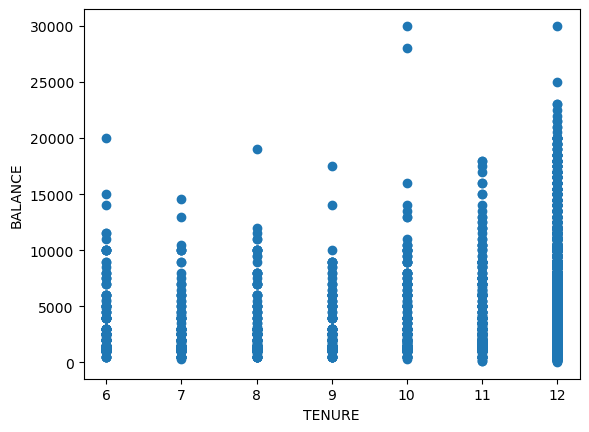

In [12]:
## plt.scatter(df.TENURE,df['BALANCE']) 

plt.scatter(df.TENURE,df['BALANCE'])
plt.xlabel('TENURE')
plt.ylabel('BALANCE')

## using the elbow method to get the numbers of clusters

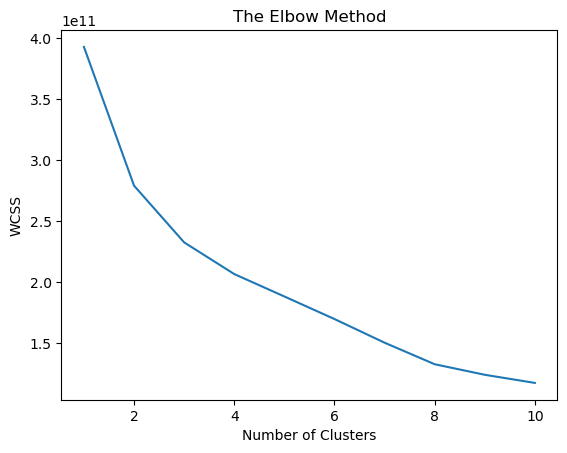

In [13]:

wcss=[]
for i in range(1,11): 
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
wcss

[393060990475.3503,
 279297738605.6229,
 232806700368.94012,
 206824677250.91333,
 188460385558.40704,
 169959520795.32568,
 150564427005.48782,
 132904014036.6555,
 124250034008.32535,
 117574518072.29068]

## model creation

In [15]:
model = KMeans(n_clusters=8, random_state=20)
pred = model.fit_predict(x)
pred

array([0, 6, 1, ..., 0, 0, 0])

In [16]:
df['CLUSTER'] = pd.DataFrame(pred,columns=['CLUSTER'])

In [17]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [18]:
## getting the number of clusters
model.cluster_centers_

array([[7.81917660e+02, 8.50316865e-01, 4.96525997e+02, 2.39305970e+02,
        2.57522341e+02, 4.42085601e+02, 4.51404802e-01, 1.29238921e-01,
        3.47436767e-01, 1.07460486e-01, 2.19166826e+00, 9.35811198e+00,
        2.11998503e+03, 8.57445027e+02, 5.45016371e+02, 1.43672156e-01,
        1.13669024e+01],
       [8.89550903e+02, 8.71612697e-01, 1.20699513e+03, 7.05607784e+02,
        5.01608959e+02, 2.26625863e+02, 6.19879839e-01, 3.31826914e-01,
        4.29135131e-01, 4.94914677e-02, 9.28446771e-01, 1.89831297e+01,
        6.97148712e+03, 1.42484210e+03, 3.63925551e+02, 2.36414702e-01,
        1.18091914e+01],
       [5.57607288e+03, 9.43097647e-01, 1.59032585e+03, 9.69917506e+02,
        6.20556137e+02, 2.09381556e+03, 5.59701316e-01, 3.29789598e-01,
        4.03986901e-01, 2.13892216e-01, 5.31346578e+00, 2.29801325e+01,
        1.35451435e+04, 2.55164178e+03, 1.73964498e+03, 1.18471693e-01,
        1.18631347e+01],
       [5.44820172e+03, 9.56126478e-01, 2.79165557e+04, 2.235

## plotting the number of clusters and seperating each clusters into a dataframe

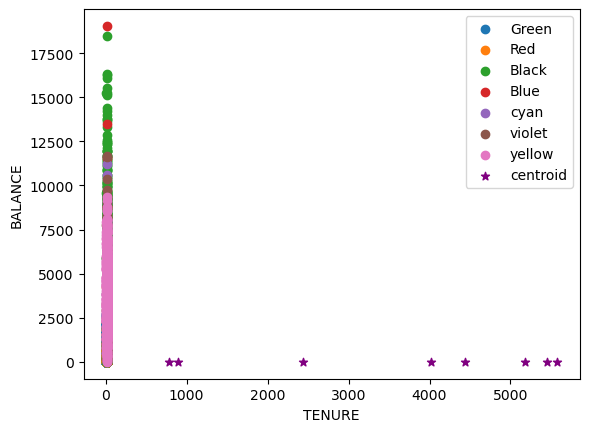

In [19]:
df1 = df[df.CLUSTER==0]
df2 = df[df.CLUSTER==1]
df3 = df[df.CLUSTER==2]
df4 = df[df.CLUSTER==3]
df5 = df[df.CLUSTER==4]
df6 = df[df.CLUSTER==5]
df7 = df[df.CLUSTER==6]
df8 = df[df.CLUSTER==7]

plt.scatter(df1.TENURE,df1['BALANCE'],label='Green')
plt.scatter(df2.TENURE,df2['BALANCE'],label='Red')
plt.scatter(df3.TENURE,df3['BALANCE'],label='Black')
plt.scatter(df4.TENURE,df4['BALANCE'],label='Blue')
plt.scatter(df5.TENURE,df5['BALANCE'],label='cyan')
plt.scatter(df6.TENURE,df6['BALANCE'],label='violet')
plt.scatter(df7.TENURE,df7['BALANCE'],label='yellow')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.legend()

In [45]:
df1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,0.002148,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
4,C10005,0.042940,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
5,C10006,0.095038,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
7,C10008,0.095764,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,0
10,C10011,0.067905,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,0.001496,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,C19187,0.001007,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,C19188,0.001229,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,C19189,0.000707,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [22]:
df2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,C18962,1374.266113,1.000000,1814.30,1596.80,217.50,0.000000,0.666667,0.333333,0.416667,0.000000,0,10,6500.0,2668.399516,413.987806,0.000000,12,1
8743,C18982,40.960739,0.181818,472.75,431.37,41.38,0.000000,0.181818,0.181818,0.090909,0.000000,0,7,13000.0,0.000000,864.206542,0.000000,11,1
8745,C18984,1000.814822,0.285714,0.00,0.00,0.00,3465.266978,0.000000,0.000000,0.000000,0.142857,6,0,6000.0,235.351288,460.696500,0.000000,7,1
8769,C19008,116.581583,0.818182,1045.14,227.14,818.00,0.000000,0.727273,0.181818,0.545455,0.000000,0,17,9000.0,1258.396242,144.115556,0.333333,11,1


In [24]:
df3

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.0,12,2
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.0,12,2
30,C10031,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12,2
32,C10033,6732.823064,1.000000,324.95,324.95,0.00,1189.533753,0.083333,0.083333,0.000000,0.166667,3,3,10500.0,1720.118876,2506.745366,0.0,12,2
85,C10089,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,16500.0,1275.229436,171.357189,1.0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,C17802,7114.235621,1.000000,1072.24,1000.00,72.24,2088.213086,0.666667,0.083333,0.583333,0.250000,7,9,10000.0,1837.750949,2449.812844,0.0,12,2
7764,C17975,10856.483010,1.000000,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.0,12,2
7962,C18177,13318.659120,1.000000,3504.74,3266.29,238.45,1306.849608,0.636364,0.545455,0.272727,0.181818,3,16,17500.0,2594.820938,4762.246065,0.0,11,2
8217,C18437,5658.669875,1.000000,740.89,0.00,740.89,4599.296640,0.583333,0.000000,0.583333,0.166667,5,7,11000.0,1328.416237,1851.570072,0.0,12,2


In [26]:
df4

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12,3
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12,3
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,3
507,C10529,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.27662,534.032339,1.000000,12,3
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12,3
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12,3
941,C10975,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.000000,1.000000,1.000000,0.000000,0,175,19500.0,19517.16160,517.324081,0.333333,12,3
970,C11004,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0,55,28000.0,26557.09724,586.029097,0.875000,10,3
1190,C11234,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0,140,18000.0,22558.28457,505.125031,1.000000,12,3
1256,C11300,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12,3


In [28]:
df5

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.55831,0.0,12,4
387,C10400,7957.017218,1.000000,0.00,0.00,0.00,4909.937494,0.000000,0.000000,0.000000,0.250000,4,0,9000.0,677.144841,27631.45072,0.0,12,4
393,C10407,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,11000.0,7932.774020,17494.90735,0.0,12,4
519,C10543,1874.601636,1.000000,305.78,0.00,305.78,0.000000,0.583333,0.000000,0.583333,0.000000,0,14,1500.0,518.757481,19977.00572,0.0,12,4
567,C10591,3457.086184,1.000000,2448.60,0.00,2448.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12,4
666,C10693,1418.254924,1.000000,362.13,0.00,362.13,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,1200.0,496.114334,15914.72154,0.0,12,4
697,C10724,4414.952906,1.000000,419.64,0.00,419.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4200.0,467.204852,24302.09819,0.0,12,4
1027,C11062,2294.145941,1.000000,29.29,0.00,29.29,137.256946,0.083333,0.000000,0.083333,0.083333,2,1,2100.0,149.363733,17693.07847,0.0,12,4
1130,C11170,6090.522273,1.000000,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,9000.0,568.781100,30528.43240,0.0,12,4
1676,C11731,7499.303650,1.000000,350.57,350.57,0.00,948.293789,0.083333,0.083333,0.000000,0.250000,6,3,7500.0,1326.434054,19060.53475,0.0,12,4


In [29]:
df5.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.0
mean,4438.237601,0.985258,1194.728378,172.967838,1021.760541,1024.245606,0.512899,0.050368,0.483006,0.086814,2.972973,23.027027,4652.702703,1534.813466,27711.273916,0.0,11.918919,4.0
std,2584.047129,0.054686,2241.094921,464.127557,2104.859422,2084.615326,0.447789,0.083337,0.470322,0.109049,4.506085,36.361218,3005.549172,2225.102126,14069.663668,0.0,0.276725,0.0
min,1418.254924,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,46.969049,15584.097420,0.0,11.000000,4.0
25%,2431.019916,1.000000,29.290000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2100.000000,294.153872,17862.558310,0.0,12.000000,4.0
50%,3517.101616,1.000000,419.640000,0.000000,305.780000,0.000000,0.583333,0.000000,0.583333,0.000000,0.000000,12.000000,4000.000000,518.300462,24302.098190,0.0,12.000000,4.0
75%,6022.224462,1.000000,966.600000,45.650000,912.540000,797.158950,1.000000,0.083333,1.000000,0.166667,4.000000,21.000000,7500.000000,1497.318035,29019.802880,0.0,12.000000,4.0
max,11209.370760,1.000000,11147.330000,2463.000000,10009.930000,10616.270140,1.000000,0.333333,1.000000,0.363636,17.000000,162.000000,11000.000000,8735.607835,76406.207520,0.0,12.000000,4.0


In [30]:
df6

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,5
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,5
57,C10059,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,5
84,C10088,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,5
90,C10095,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,C18773,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,5
8662,C18899,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,5
8689,C18926,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,5
8737,C18975,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,5


In [32]:
df7

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,C10002,3202.467416,0.909091,0.00,0.0,0.00,6442.945483,0.000000,0.0,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
15,C10016,6886.213231,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.0,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,6
19,C10020,3577.970933,1.000000,398.64,0.0,398.64,0.000000,1.000000,0.0,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,6
24,C10025,5368.571219,1.000000,0.00,0.0,0.00,798.949863,0.000000,0.0,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,6
36,C10037,7427.076941,1.000000,0.00,0.0,0.00,8873.375046,0.000000,0.0,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,C19053,3335.053583,0.700000,0.00,0.0,0.00,5823.467109,0.000000,0.0,0.000000,0.300000,3,0,7000.0,931.371718,1006.983314,0.000000,10,6
8839,C19080,3271.424058,0.888889,1173.28,0.0,1173.28,4122.912645,0.888889,0.0,0.777778,0.333333,4,16,5000.0,817.177789,999.725550,0.000000,9,6
8840,C19081,2588.410789,0.888889,787.40,0.0,787.40,3762.650329,0.777778,0.0,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9,6
8863,C19104,1382.936306,0.875000,336.00,0.0,336.00,4158.990631,0.875000,0.0,0.750000,0.125000,5,7,4000.0,754.256439,681.059427,0.600000,8,6


In [34]:
df8

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,7
39,C10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,12,7
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,7
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,7
109,C10114,6644.201651,1.000000,4478.75,2721.59,1757.16,7205.520805,1.000000,0.916667,1.000000,0.583333,21,64,9000.0,10857.943210,2469.571326,0.083333,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,C17894,4486.637152,1.000000,1712.75,1712.75,0.00,13665.032070,0.250000,0.250000,0.000000,0.750000,15,4,9500.0,10105.486720,1154.029789,0.000000,12,7
8237,C18458,2144.040539,1.000000,0.00,0.00,0.00,14127.466640,0.000000,0.000000,0.000000,0.416667,23,0,3500.0,12571.814660,525.168936,0.300000,12,7
8315,C18536,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12,7
8422,C18648,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,7


## applying scaling on the dataset and repeating the privouse steps

In [36]:
scaler = MinMaxScaler()

scaler.fit(df[['BALANCE']])
df['BALANCE'] = scaler.transform(df[['BALANCE']])

scaler.fit(df[['BALANCE']])
df['BALANCE'] = scaler.transform(df[['BALANCE']])

In [37]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,0.002148,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,0.168169,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,C10003,0.131026,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,0.087521,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,0.042940,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Text(0, 0.5, 'BALANCE')

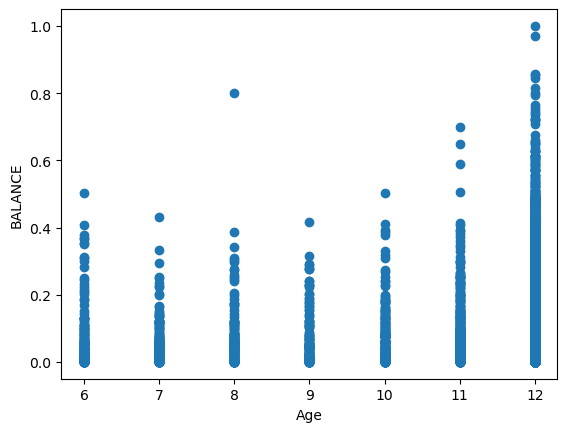

In [38]:
plt.scatter(df.TENURE,df['BALANCE'])
plt.xlabel('Age')
plt.ylabel('BALANCE')

In [39]:
model = KMeans(n_clusters=8, random_state=20)
pred = model.fit_predict(x)
pred

array([0, 6, 1, ..., 0, 0, 0])

In [40]:
df['CLUSTER'] = pd.DataFrame(pred,columns=['CLUSTER'])

In [41]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,0.002148,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,0.168169,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,C10003,0.131026,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,0.087521,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,0.042940,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,0.001496,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,0.001007,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,C19188,0.001229,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,0.000707,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [42]:
model.cluster_centers_

array([[7.81917660e+02, 8.50316865e-01, 4.96525997e+02, 2.39305970e+02,
        2.57522341e+02, 4.42085601e+02, 4.51404802e-01, 1.29238921e-01,
        3.47436767e-01, 1.07460486e-01, 2.19166826e+00, 9.35811198e+00,
        2.11998503e+03, 8.57445027e+02, 5.45016371e+02, 1.43672156e-01,
        1.13669024e+01],
       [8.89550903e+02, 8.71612697e-01, 1.20699513e+03, 7.05607784e+02,
        5.01608959e+02, 2.26625863e+02, 6.19879839e-01, 3.31826914e-01,
        4.29135131e-01, 4.94914677e-02, 9.28446771e-01, 1.89831297e+01,
        6.97148712e+03, 1.42484210e+03, 3.63925551e+02, 2.36414702e-01,
        1.18091914e+01],
       [5.57607288e+03, 9.43097647e-01, 1.59032585e+03, 9.69917506e+02,
        6.20556137e+02, 2.09381556e+03, 5.59701316e-01, 3.29789598e-01,
        4.03986901e-01, 2.13892216e-01, 5.31346578e+00, 2.29801325e+01,
        1.35451435e+04, 2.55164178e+03, 1.73964498e+03, 1.18471693e-01,
        1.18631347e+01],
       [5.44820172e+03, 9.56126478e-01, 2.79165557e+04, 2.235

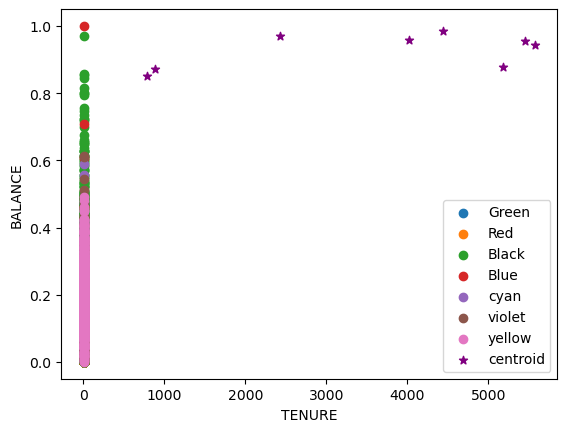

In [43]:
df1 = df[df.CLUSTER==0]
df2 = df[df.CLUSTER==1]
df3 = df[df.CLUSTER==2]
df4 = df[df.CLUSTER==3]
df5 = df[df.CLUSTER==4]
df6 = df[df.CLUSTER==5]
df7 = df[df.CLUSTER==6]
df8 = df[df.CLUSTER==7]

plt.scatter(df1.TENURE,df1['BALANCE'],label='Green')
plt.scatter(df2.TENURE,df2['BALANCE'],label='Red')
plt.scatter(df3.TENURE,df3['BALANCE'],label='Black')
plt.scatter(df4.TENURE,df4['BALANCE'],label='Blue')
plt.scatter(df5.TENURE,df5['BALANCE'],label='cyan')
plt.scatter(df6.TENURE,df6['BALANCE'],label='violet')
plt.scatter(df7.TENURE,df7['BALANCE'],label='yellow')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.legend()

## using silhouette_score to evalute our model

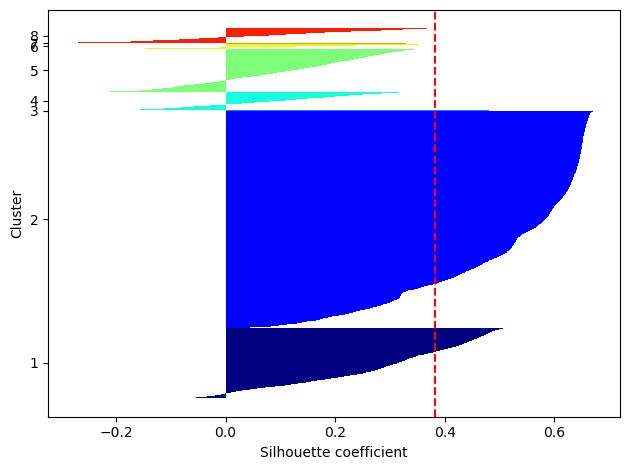

In [44]:
model = KMeans(n_clusters=8, 
            init='k-means++', 
            n_init=10, 
            max_iter=300)
pred = model.fit_predict(x)

cluster_labels = np.unique(pred)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, pred, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()
